#Import bibliotek

In [1624]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc

#Zapoznanie ze zbiorem danych

In [1556]:
employee=pd.read_csv('HR Employee Attrition.csv')

In [1557]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [1558]:
employee.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [1559]:
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [1560]:
pd.set_option('display.max_columns', None)
employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [1561]:
employee['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [1562]:
employee["Department"].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [1563]:
employee["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [1564]:
employee["OverTime"].unique()

array(['Yes', 'No'], dtype=object)

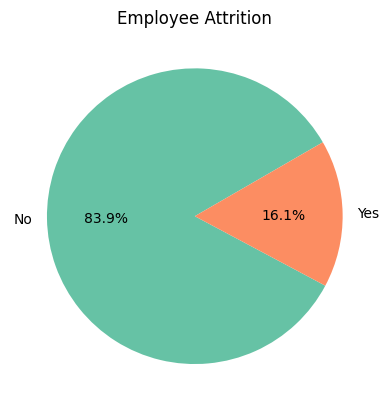

In [1565]:
value_counts = employee['Attrition'].value_counts()
plt.pie(value_counts.values, labels=['No', 'Yes'], autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=30)
plt.title('Employee Attrition')
plt.show()



<ipython-input-1566-65f3e2c41b6e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(employee.Age)


<Axes: xlabel='Age', ylabel='Density'>

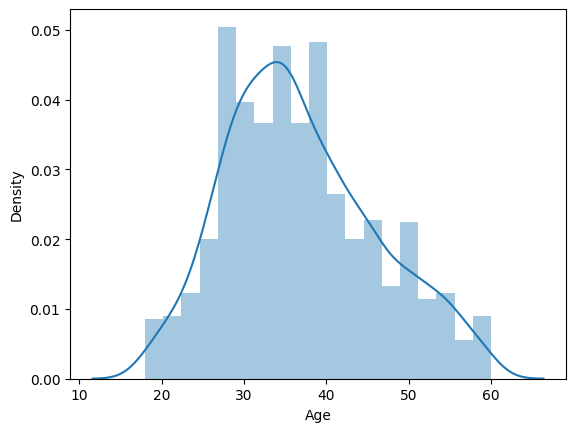

In [1566]:
sns.distplot(employee.Age)
             

<ipython-input-1567-7e6909437073>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(employee.MonthlyIncome)


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

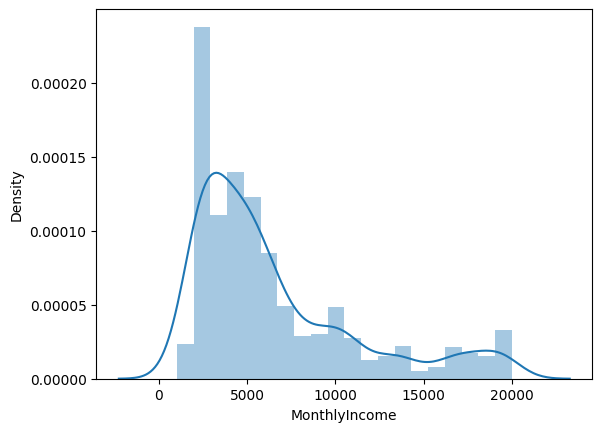

In [1567]:
sns.distplot(employee.MonthlyIncome)

<ipython-input-1568-b96b3baed0fe>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


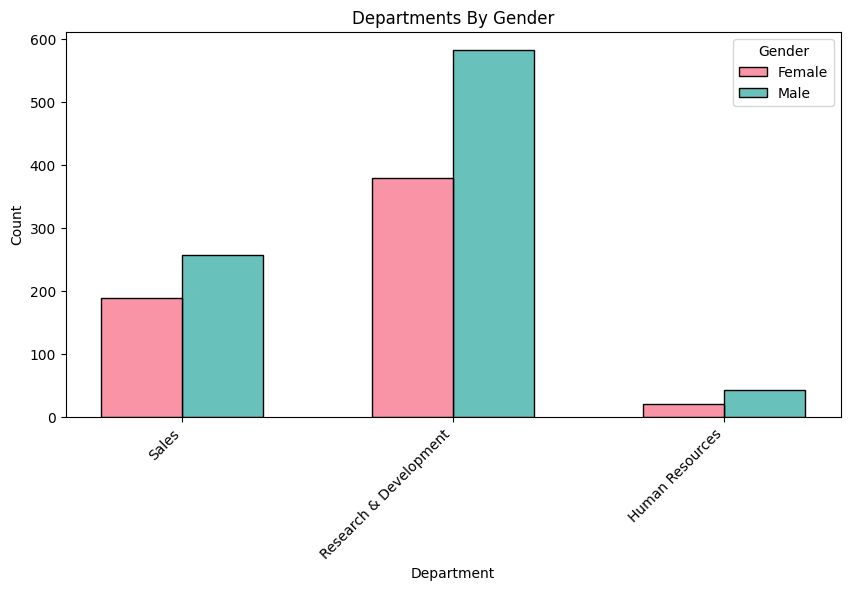

In [1568]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x='Department', data=employee, hue='Gender', multiple="dodge", shrink=.6, palette="husl")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Departments By Gender")
plt.show()

<ipython-input-1569-b9ebb070d6ec>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


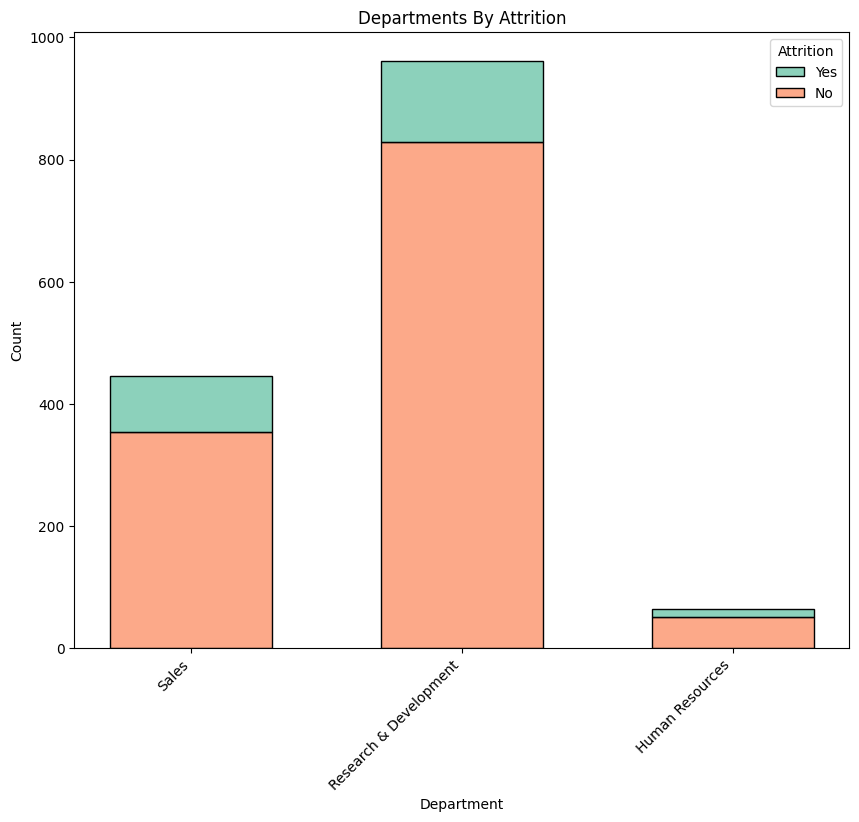

In [1569]:

fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(x='Department', data=employee, hue='Attrition', multiple='stack', shrink=.6, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Departments By Attrition")
plt.show()   


<ipython-input-1570-b928593588d2>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


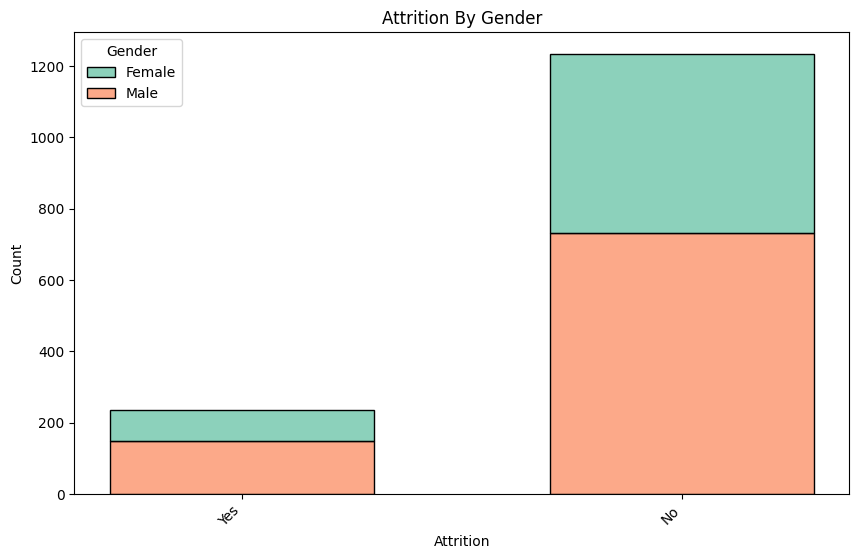

In [1570]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(x='Attrition', data=employee, hue='Gender', multiple='stack', shrink=.6, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Attrition By Gender")
plt.show()  

<ipython-input-1571-888ae6b80968>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Department',y='DistanceFromHome', data=employee,hue='Attrition',palette='Set2', ci = None)


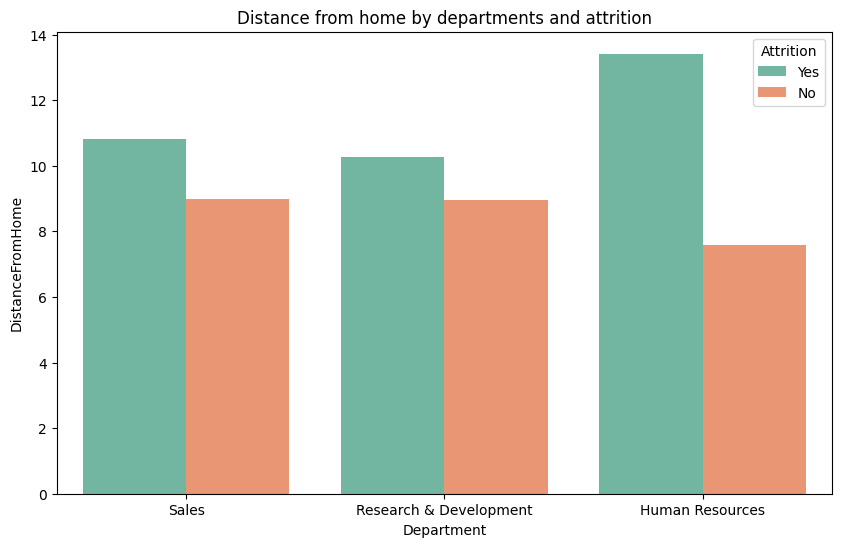

In [1571]:
plt.figure(figsize=(10,6))
sns.barplot(x='Department',y='DistanceFromHome', data=employee,hue='Attrition',palette='Set2', ci = None)
plt.title("Distance from home by departments and attrition")
plt.show()

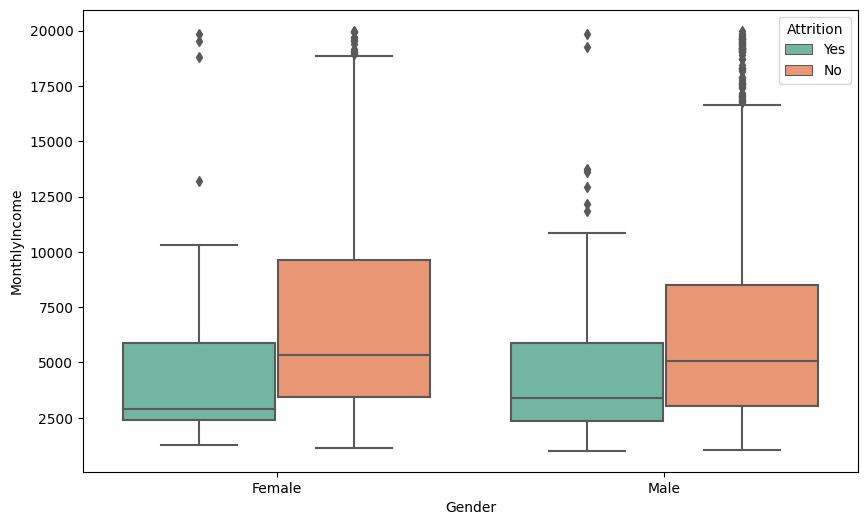

In [1572]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Gender", y="MonthlyIncome", data=employee,hue='Attrition',palette='Set2')
plt.show()

#Przetwarzanie danych

In [1573]:
#zmiana object na int

employee['Attrition'] = employee['Attrition'].astype('category').cat.codes
employee['BusinessTravel'] = employee['BusinessTravel'].astype('category').cat.codes
employee['Department'] = employee['Department'].astype('category').cat.codes
employee['EducationField'] = employee['EducationField'].astype('category').cat.codes
employee['Gender'] = employee['Gender'].astype('category').cat.codes
employee['JobRole'] = employee['JobRole'].astype('category').cat.codes
employee['MaritalStatus'] = employee['MaritalStatus'].astype('category').cat.codes
employee['Over18'] = employee['Over18'].astype('category').cat.codes
employee['OverTime'] = employee['OverTime'].astype('category').cat.codes

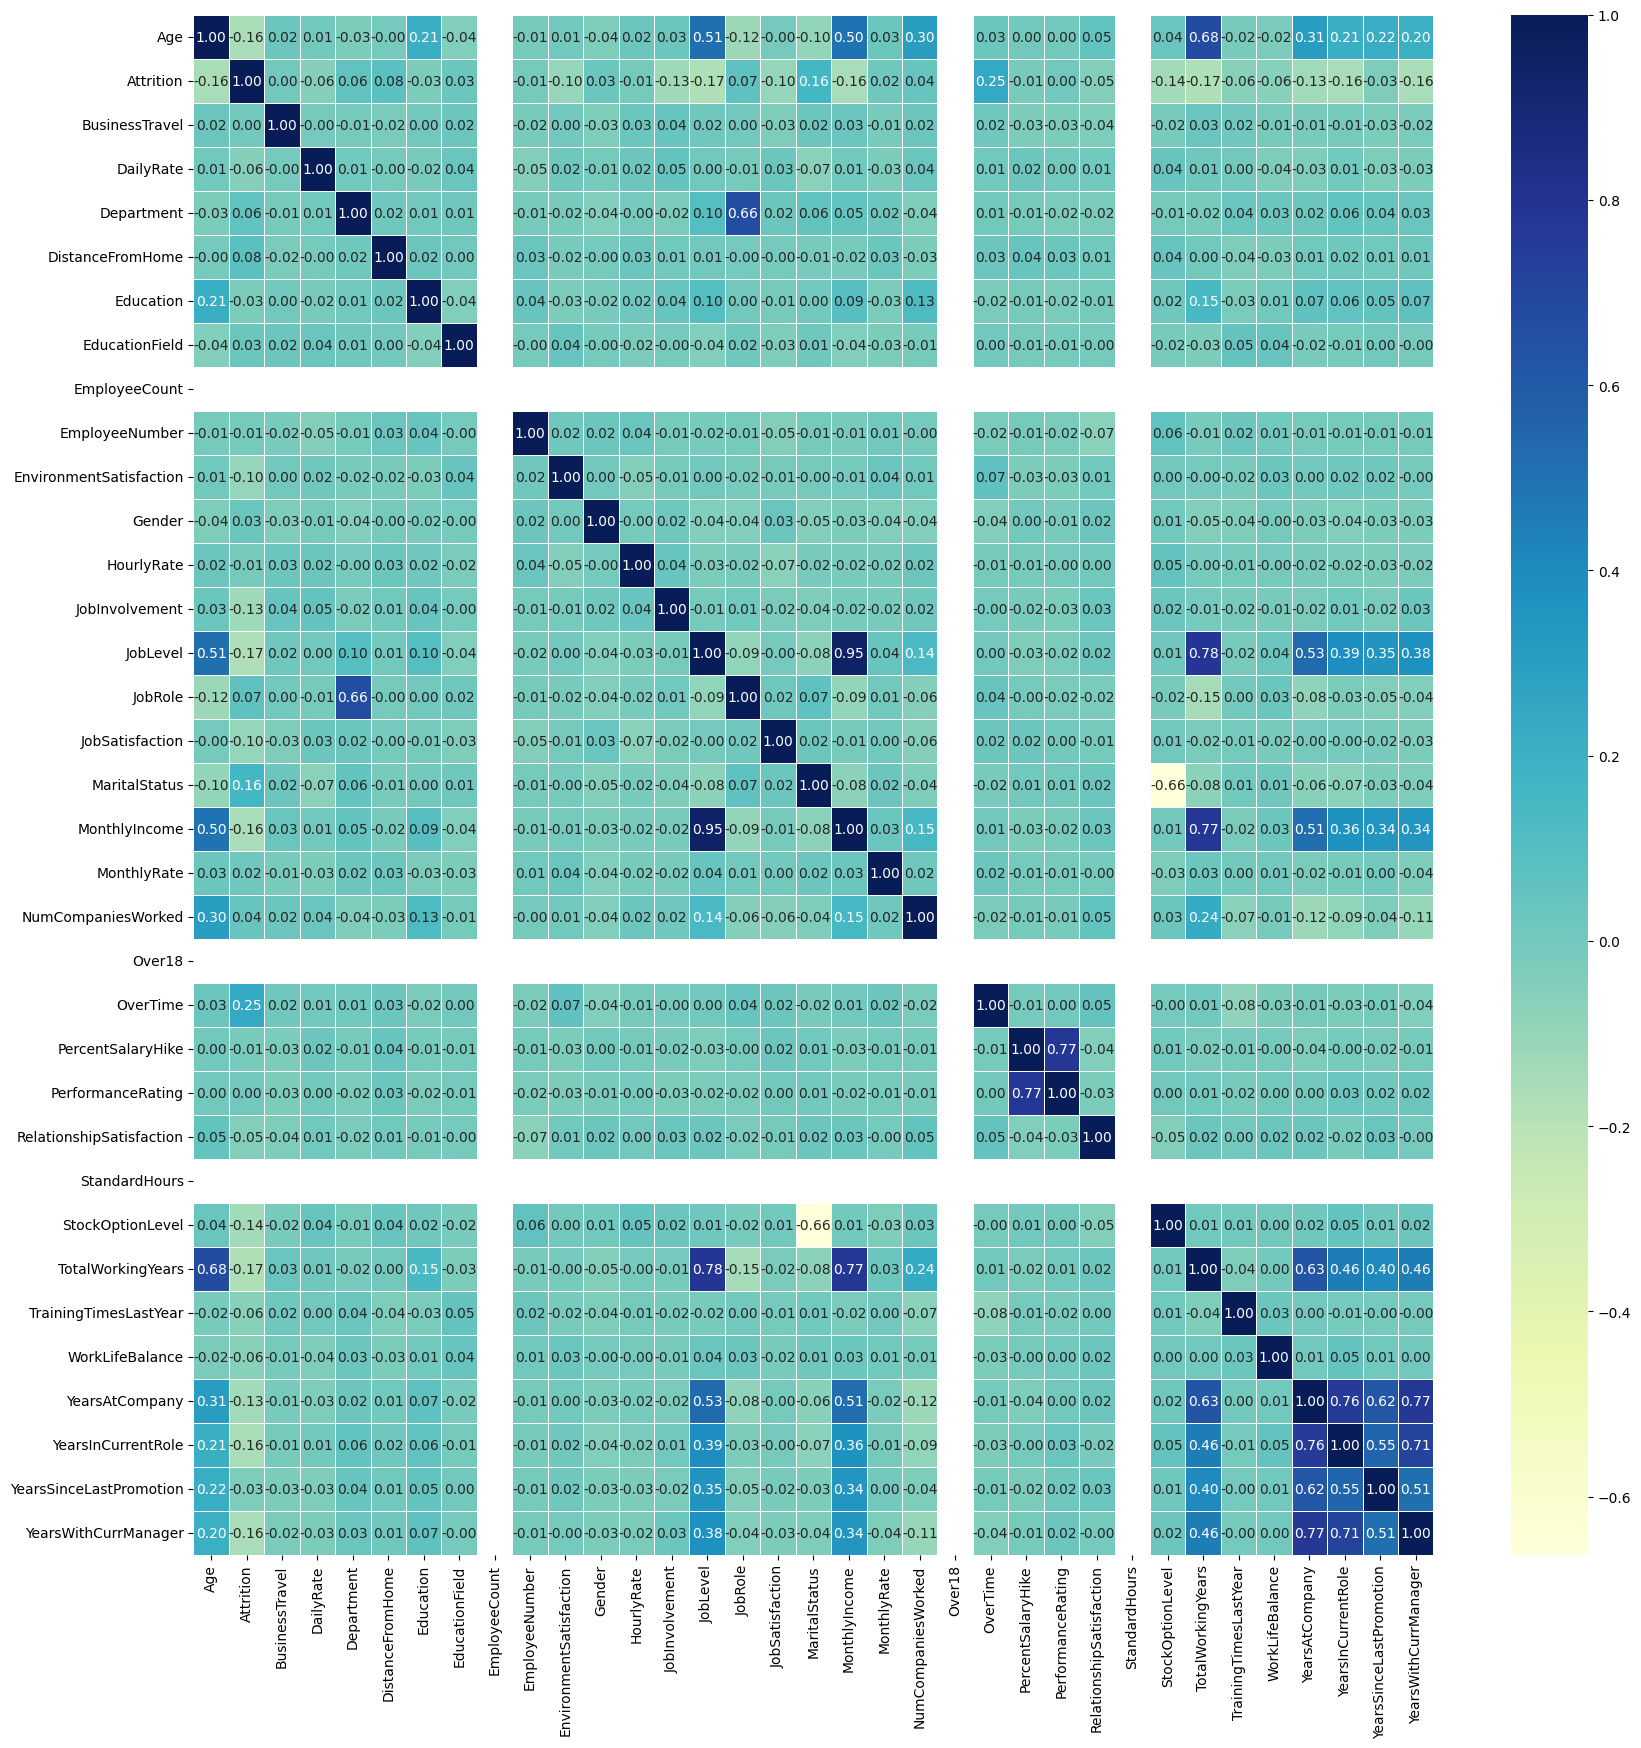

In [1574]:
#Heatmap
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(employee.corr(), annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")
plt.show()

In [1575]:
employee.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [1576]:
employee=employee.drop(['EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1)  #usuwanie kolumn z std=0

In [1577]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int8 
 2   BusinessTravel            1470 non-null   int8 
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int8 
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int8 
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int8 
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int8 
 14  JobSatisfaction           1470 non-null 

In [1578]:
# Podział X i y
y = employee.pop('Attrition')
X = employee

In [1579]:
# Standaryzacja X
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [1580]:
# Podział na zbiór testowy i treningowy
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

In [1581]:
Counter(y_train)

Counter({0: 977, 1: 199})

In [1582]:
Counter(y_test)

Counter({1: 38, 0: 256})

In [1583]:
# Zastosowanie oversamplingu na danych treningowych (dane niezbalansowane)
oversampler = RandomOverSampler()
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [1584]:
Counter(y_train)

Counter({0: 977, 1: 977})

#Modele predykcyjne

##SVM

In [1585]:
svm=SVC(kernel='poly', class_weight='balanced')
svm.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='poly')

In [1586]:
y_pred_svc = svm.predict(X_test)

In [1587]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       256
           1       0.49      0.45      0.47        38

    accuracy                           0.87       294
   macro avg       0.70      0.69      0.70       294
weighted avg       0.86      0.87      0.87       294



<Axes: >

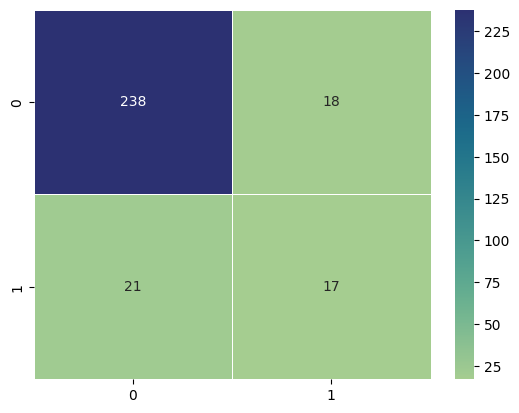

In [1588]:
cm=confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True, fmt='d', cmap="crest", linewidth=.5)

##KNN

In [1589]:
knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [1590]:
y_pred_knn = knn.predict(X_test)

In [1591]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       256
           1       0.15      0.34      0.21        38

    accuracy                           0.67       294
   macro avg       0.52      0.53      0.50       294
weighted avg       0.79      0.67      0.72       294



<Axes: >

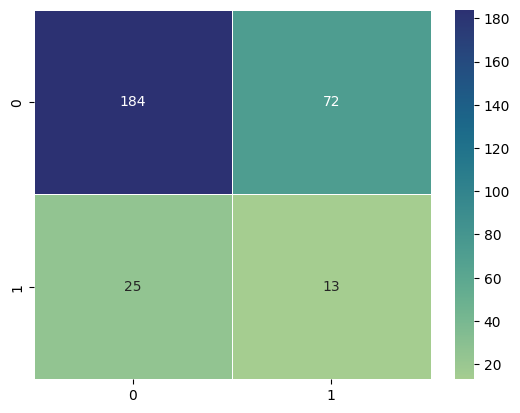

In [1592]:
cm=confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap="crest", linewidth=.5)

##Regresja logistyczna

In [1593]:
log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [1594]:
y_pred_lr = log_model.predict(X_test)

In [1595]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       256
           1       0.28      0.74      0.41        38

    accuracy                           0.72       294
   macro avg       0.61      0.73      0.61       294
weighted avg       0.86      0.72      0.76       294



<Axes: >

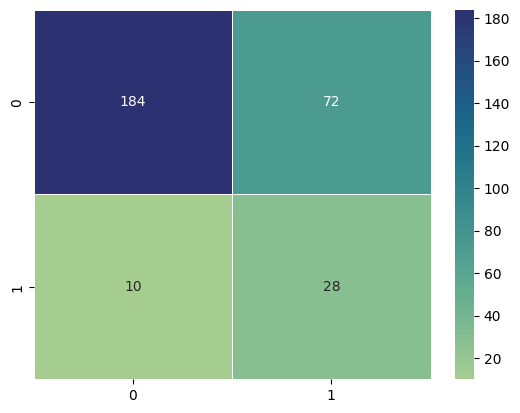

In [1596]:
cm=confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap="crest", linewidth=.5)

##Drzewo decyzyjne

In [1597]:
dt = DecisionTreeClassifier(criterion='log_loss', max_depth=10, class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=10)

In [1598]:
y_pred_dt = dt.predict(X_test)

In [1599]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       256
           1       0.19      0.37      0.25        38

    accuracy                           0.71       294
   macro avg       0.54      0.57      0.53       294
weighted avg       0.80      0.71      0.75       294



<Axes: >

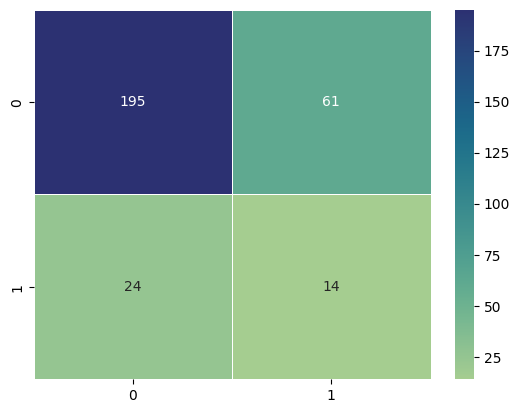

In [1600]:
cm=confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap="crest", linewidth=.5)

##Random forest

In [1601]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [1602]:
y_pred_rf = rf_model.predict(X_test)

In [1603]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       256
           1       0.73      0.21      0.33        38

    accuracy                           0.89       294
   macro avg       0.81      0.60      0.63       294
weighted avg       0.87      0.89      0.86       294



<Axes: >

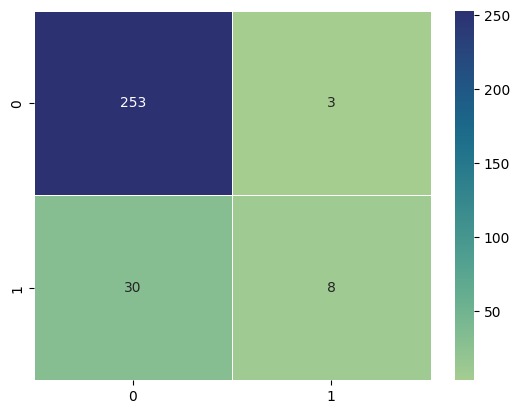

In [1604]:
cm=confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap="crest", linewidth=.5)

##Random forest - grid search

In [1605]:
params = {'n_estimators':[10, 50, 75, 100],
          'max_depth': [None, 5, 10, 15],
          'min_samples_split': [2, 5, 7, 10],
          'criterion':['gini', 'entropy', 'log_loss']}

In [1606]:
searcher=GridSearchCV(rf_model, params)

In [1607]:
searcher.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [10, 50, 75, 100]})

In [1608]:
searcher.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'n_estimators': 100}

In [1609]:
searcher.best_score_

0.9815764968194636

In [1620]:
#model Random Forest z best params
rf_model=RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=2, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [1621]:
y_pred_rf_best = rf_model.predict(X_test)

In [1622]:
print(classification_report(y_test, y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       256
           1       0.71      0.26      0.38        38

    accuracy                           0.89       294
   macro avg       0.81      0.62      0.66       294
weighted avg       0.88      0.89      0.87       294



<Axes: >

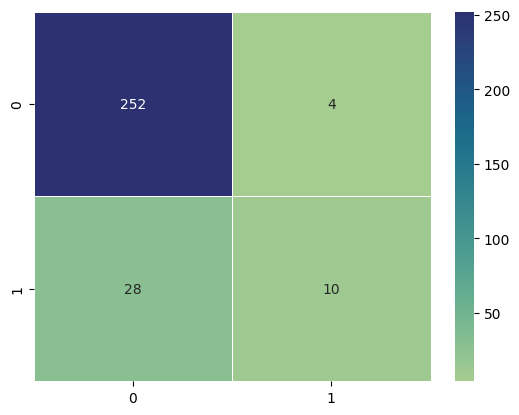

In [1623]:
cm=confusion_matrix(y_test, y_pred_rf_best)
sns.heatmap(cm, annot=True, fmt='d', cmap="crest", linewidth=.5)

In [1614]:
#Walidacja krzyżowa
kf = KFold(n_splits=5, shuffle=True)

In [1615]:
scores = cross_val_score(rf_model, X_train, y_train, cv=kf)
print(f"Wyniki walidacji krzyżowej: {scores}")
print(f"Średni wyniki walidacji krzyżowej: {scores.mean()}")

Wyniki walidacji krzyżowej: [0.9769821  0.98465473 0.97186701 0.9769821  0.97179487]
Średni wyniki walidacji krzyżowej: 0.9764561610597416


##Boosting: AdaBoost

In [1616]:
ab_model = AdaBoostClassifier(n_estimators=30)
ab_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=30)

In [1617]:
y_pred_ab = ab_model.predict(X_test)

In [1618]:
print(classification_report(y_test, y_pred_ab))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88       256
           1       0.36      0.74      0.49        38

    accuracy                           0.80       294
   macro avg       0.66      0.77      0.68       294
weighted avg       0.88      0.80      0.83       294



<Axes: >

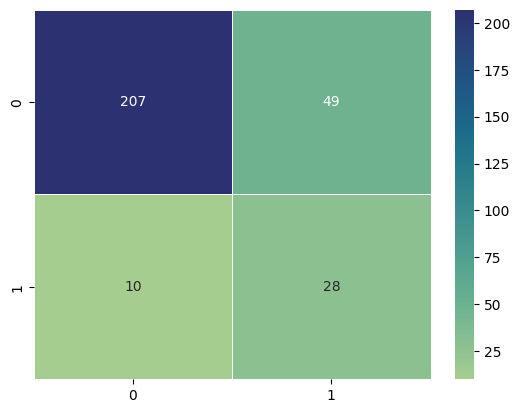

In [1619]:
cm=confusion_matrix(y_test, y_pred_ab)
sns.heatmap(cm, annot=True, fmt='d', cmap="crest", linewidth=.5)

#ROC

In [1625]:
fpr_svc, tpr_svc, _=roc_curve(y_test, y_pred_svc)
fpr_knn, tpr_knn, _=roc_curve(y_test, y_pred_knn)
fpr_lr, tpr_lr, _=roc_curve(y_test, y_pred_lr)
fpr_dt, tpr_dt, _=roc_curve(y_test, y_pred_dt)
fpr_rf, tpr_rf, _=roc_curve(y_test, y_pred_rf)
fpr_rf_best, tpr_rf_best, _=roc_curve(y_test, y_pred_rf_best)
fpr_ab, tpr_ab, _=roc_curve(y_test, y_pred_ab)

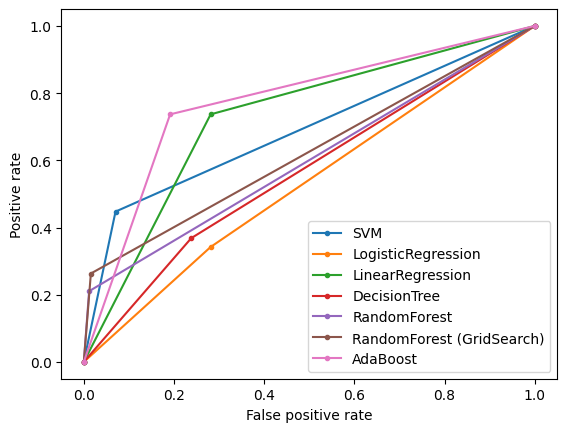

In [1627]:
plt.plot(fpr_svc, tpr_svc, marker='.', label='SVM')
plt.plot(fpr_knn, tpr_knn, marker='.', label='LogisticRegression')
plt.plot(fpr_lr, tpr_lr, marker='.', label='LinearRegression')
plt.plot(fpr_dt, tpr_dt, marker='.', label='DecisionTree')
plt.plot(fpr_rf, tpr_rf, marker='.', label='RandomForest')
plt.plot(fpr_rf_best, tpr_rf_best, marker='.', label='RandomForest (GridSearch)')
plt.plot(fpr_ab, tpr_ab, marker='.', label='AdaBoost')
plt.xlabel('False positive rate')
plt.ylabel('Positive rate')
plt.legend()
plt.show()